El objetivo de este problema es implementar un auto-codificador y probarlo con el conjunto de
datos dígits que forma parte de los conjuntos de datos de scikit-learn (load_digits). Estos son
dígitos escritos a mano transformados en imágenes de tamaño 8×8 representados como vectores
de 64 elementos con valores en el rango [0,15] (escala de grises).

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
from pandas import read_csv

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn import set_config

from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB, MultinomialNB

from sklearn.model_selection import GridSearchCV

from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.classifier import precision_recall_curve

import warnings

set_config(display='text')
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 16})
pd.set_option('display.precision', 3)

La pérdida será el error al cuadrático, el optimizador adam. Podéis ver que al ajustar el auto-
codificador, la entrada y la salida son los mismos datos. El tamaño de BATCH y el número de
EPOCHS son hiperparámetros. Una vez entrenamos el autocodificador, la red codificador
(que es solo la primera parte del auto-codificador) se puede usar para transformar los datos al
espacio de menor dimensionalidad.

Cargad el conjunto de datos de dígitos, dividid los datos en entrenamiento y test (70 %/30 %)
y normalizad los datos a la escala [0,1] adecuadamente (pensad que son imágenes)

In [3]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y = True)

In [4]:
X = X / 16 #normalizamos dividiendo entre 16 ya que los pixeles tienen valores entre 0 y 16

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Fijad el tamaño de la capa intermedia a 2 y experimentad con algunos tamaños para las
otras capas ocultas (siempre una potencia de 2) usando como funciones de activación
linear, sigmoid y relu. Para mantener bajo el tiempo de entrenamiento, el tamaño del
lote puede ser grande (alrededor de 100), el número de épocas debe ser del orden de miles,
usad los experimentos con la función de activación lineal para fijar estos valores.
Calculad el error cuadrático (MSE) final después de entrenar las redes para los datos de
entrenamiento y los datos de test como la media de las diferencias cuadráticas entre los
datos y las predicciones.

Para cada función de activación, para la red con el mejor error cuadrático, representad las predicciones 2D para los datos de entrenamiento usando la red codificador.
¿Alguna de las funciones de activación ayuda a la separabilidad de las clases en 2D?
Calculad el PCA de los datos y comparad los resultados de los primeros 2 componen-
tes con los resultados del codificador. ¿Alguna de las redes produce una salida similar?
Buscad en Google la relación entre PCA y autocodificadores y explicad brevemente
lo que encontréis.

In [6]:
d2 = 2
## AQUI HAY QUE EXPERIMENTAR CON BATCH_SIZE Y EPOCHS
BATCH_SIZE = 100
EPOCHS = 1000

In [7]:
for d1 in [4, 8, 16, 32]:
  act = 'linear'
  entrada = keras.Input(shape=(64,))
  codificar = keras.layers.Dense(d1, activation=act)(entrada)
  codificar = keras.layers.Dense(d2, activation=act)(codificar)
  decodificar = keras.layers.Dense(d1, activation=act)(codificar)
  decodificar = keras.layers.Dense(64, activation=act)(decodificar)
  autocodificador = keras.Model(entrada, decodificar)
  codificador = keras.Model(entrada, codificar)
  autocodificador.compile(optimizer=keras.optimizers.Adam(),
  loss=keras.losses.MeanSquaredError())
  autocodificador.fit(X_train, X_train,batch_size=BATCH_SIZE,
  epochs=EPOCHS, verbose=False)
  print(autocodificador.evaluate(X_train, X_train))
  print(autocodificador.evaluate(X_test, X_test))

40/40 [==============================] - 0s 3ms/step - loss: 0.0525
0.05248010903596878
17/17 [==============================] - 0s 3ms/step - loss: 0.0525
0.05252368375658989
40/40 [==============================] - 0s 2ms/step - loss: 0.0525
0.05247914418578148
17/17 [==============================] - 0s 2ms/step - loss: 0.0525
0.05253961682319641
40/40 [==============================] - 0s 2ms/step - loss: 0.0525
0.05248211324214935
17/17 [==============================] - 0s 2ms/step - loss: 0.0526
0.05255764350295067
40/40 [==============================] - 0s 2ms/step - loss: 0.0525
0.05248677358031273
17/17 [==============================] - 0s 2ms/step - loss: 0.0526
0.05256345868110657


In [8]:
BATCH_SIZE = 100
EPOCHS = 2000

In [9]:
for d1 in [4, 8, 16, 32]:
  act = 'linear'
  entrada = keras.Input(shape=(64,))
  codificar = keras.layers.Dense(d1, activation=act)(entrada)
  codificar = keras.layers.Dense(d2, activation=act)(codificar)
  decodificar = keras.layers.Dense(d1, activation=act)(codificar)
  decodificar = keras.layers.Dense(64, activation=act)(decodificar)
  autocodificador = keras.Model(entrada, decodificar)
  codificador = keras.Model(entrada, codificar)
  autocodificador.compile(optimizer=keras.optimizers.Adam(),
  loss=keras.losses.MeanSquaredError())
  autocodificador.fit(X_train, X_train,batch_size=BATCH_SIZE,
  epochs=EPOCHS, verbose=False)
  print(autocodificador.evaluate(X_train, X_train))
  print(autocodificador.evaluate(X_test, X_test))

40/40 [==============================] - 0s 2ms/step - loss: 0.0525
0.0524805523455143
17/17 [==============================] - 0s 2ms/step - loss: 0.0526
0.052560046315193176
40/40 [==============================] - 0s 2ms/step - loss: 0.0525
0.052477676421403885
17/17 [==============================] - 0s 2ms/step - loss: 0.0525
0.05253058671951294
40/40 [==============================] - 0s 2ms/step - loss: 0.0525
0.0524839386343956
17/17 [==============================] - 0s 2ms/step - loss: 0.0526
0.052564289420843124
40/40 [==============================] - 0s 2ms/step - loss: 0.0525
0.05248403176665306
17/17 [==============================] - 0s 2ms/step - loss: 0.0525
0.05252344161272049


In [10]:
d1= 16 
act = 'linear'
entrada = keras.Input(shape=(64,))
codificar = keras.layers.Dense(d1, activation=act)(entrada)
codificar = keras.layers.Dense(d2, activation=act)(codificar)
decodificar = keras.layers.Dense(d1, activation=act)(codificar)
decodificar = keras.layers.Dense(64, activation=act)(decodificar)
autocodificador = keras.Model(entrada, decodificar)
codificador = keras.Model(entrada, codificar)
autocodificador.compile(optimizer=keras.optimizers.Adam(),
loss=keras.losses.MeanSquaredError())
autocodificador.fit(X_train, X_train,batch_size=BATCH_SIZE,
epochs=EPOCHS, verbose=False)
print(autocodificador.evaluate(X_train, X_train))
print(autocodificador.evaluate(X_test, X_test))

40/40 [==============================] - 0s 2ms/step - loss: 0.0525
0.05247920751571655
17/17 [==============================] - 0s 2ms/step - loss: 0.0526
0.0525561086833477


40/40 [==============================] - 0s 1ms/step


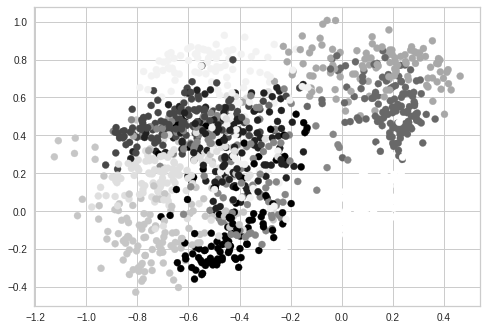

In [11]:
codif = codificador.predict(X_train)
plt.scatter(codif[:,0], codif[:,1], c=y_train)
plt.show()

In [12]:
## UNA VEZ FIJADOS EPOCHS Y BATCH, PROBAMOS LOS ACT SIGMOID Y RELU
for d1 in [4, 8, 16, 32]:
  act = 'sigmoid'
  entrada = keras.Input(shape=(64,))
  codificar = keras.layers.Dense(d1, activation=act)(entrada)
  codificar = keras.layers.Dense(d2, activation=act)(codificar)
  decodificar = keras.layers.Dense(d1, activation=act)(codificar)
  decodificar = keras.layers.Dense(64, activation=act)(decodificar)
  autocodificador = keras.Model(entrada, decodificar)
  codificador = keras.Model(entrada, codificar)
  autocodificador.compile(optimizer=keras.optimizers.Adam(),
  loss=keras.losses.MeanSquaredError())
  autocodificador.fit(X_train, X_train,batch_size=BATCH_SIZE,
  epochs=EPOCHS, verbose=False)
  print(autocodificador.evaluate(X_train, X_train))
  print(autocodificador.evaluate(X_test, X_test))

40/40 [==============================] - 0s 2ms/step - loss: 0.0498
0.04977194219827652
17/17 [==============================] - 0s 2ms/step - loss: 0.0499
0.04989400878548622
40/40 [==============================] - 0s 2ms/step - loss: 0.0413
0.04132977873086929
17/17 [==============================] - 0s 2ms/step - loss: 0.0435
0.043501388281583786
40/40 [==============================] - 0s 2ms/step - loss: 0.0376
0.03755710646510124
17/17 [==============================] - 0s 2ms/step - loss: 0.0394
0.03941784054040909
40/40 [==============================] - 0s 2ms/step - loss: 0.0351
0.03508599102497101
17/17 [==============================] - 0s 2ms/step - loss: 0.0370
0.03696490451693535


In [13]:
d1 =32
act = 'sigmoid'
entrada = keras.Input(shape=(64,))
codificar = keras.layers.Dense(d1, activation=act)(entrada)
codificar = keras.layers.Dense(d2, activation=act)(codificar)
decodificar = keras.layers.Dense(d1, activation=act)(codificar)
decodificar = keras.layers.Dense(64, activation=act)(decodificar)
autocodificador = keras.Model(entrada, decodificar)
codificador = keras.Model(entrada, codificar)
autocodificador.compile(optimizer=keras.optimizers.Adam(),
loss=keras.losses.MeanSquaredError())
autocodificador.fit(X_train, X_train,batch_size=BATCH_SIZE,
epochs=EPOCHS, verbose=False)
print(autocodificador.evaluate(X_train, X_train))
print(autocodificador.evaluate(X_test, X_test))

40/40 [==============================] - 0s 2ms/step - loss: 0.0358
0.035845473408699036
17/17 [==============================] - 0s 2ms/step - loss: 0.0388
0.0387759730219841


40/40 [==============================] - 0s 1ms/step


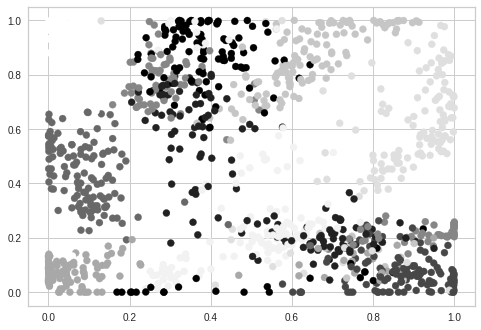

In [14]:
## REPRESENTACION CON CODIFICADOR DE LA MEJOR SIGMOID
codif = codificador.predict(X_train)
plt.scatter(codif[:,0], codif[:,1], c=y_train)
plt.show()

In [15]:
## UNA VEZ FIJADOS EPOCHS Y BATCH, PROBAMOS LOS ACT SIGMOID Y RELU
for d1 in [4, 8, 16, 32]:
  act = 'relu'
  entrada = keras.Input(shape=(64,))
  codificar = keras.layers.Dense(d1, activation=act)(entrada)
  codificar = keras.layers.Dense(d2, activation=act)(codificar)
  decodificar = keras.layers.Dense(d1, activation=act)(codificar)
  decodificar = keras.layers.Dense(64, activation=act)(decodificar)
  autocodificador = keras.Model(entrada, decodificar)
  codificador = keras.Model(entrada, codificar)
  autocodificador.compile(optimizer=keras.optimizers.Adam(),
  loss=keras.losses.MeanSquaredError())
  autocodificador.fit(X_train, X_train,batch_size=BATCH_SIZE,
  epochs=EPOCHS, verbose=False)
  print(autocodificador.evaluate(X_train, X_train))
  print(autocodificador.evaluate(X_test, X_test))

40/40 [==============================] - 0s 2ms/step - loss: 0.0754
0.07539784163236618
17/17 [==============================] - 0s 2ms/step - loss: 0.0754
0.07535979151725769
40/40 [==============================] - 0s 2ms/step - loss: 0.0889
0.0889073833823204
17/17 [==============================] - 0s 2ms/step - loss: 0.0887
0.08865979313850403
40/40 [==============================] - 0s 2ms/step - loss: 0.0907
0.09070612490177155
17/17 [==============================] - 0s 2ms/step - loss: 0.0895
0.08945494890213013
40/40 [==============================] - 0s 2ms/step - loss: 0.0684
0.06835159659385681
17/17 [==============================] - 0s 2ms/step - loss: 0.0744
0.07436712831258774


In [16]:
## UNA VEZ FIJADOS EPOCHS Y BATCH, PROBAMOS LOS ACT SIGMOID Y RELU
d1 = 32
act = 'relu'
entrada = keras.Input(shape=(64,))
codificar = keras.layers.Dense(d1, activation=act)(entrada)
codificar = keras.layers.Dense(d2, activation=act)(codificar)
decodificar = keras.layers.Dense(d1, activation=act)(codificar)
decodificar = keras.layers.Dense(64, activation=act)(decodificar)
autocodificador = keras.Model(entrada, decodificar)
codificador = keras.Model(entrada, codificar)
autocodificador.compile(optimizer=keras.optimizers.Adam(),
loss=keras.losses.MeanSquaredError())
autocodificador.fit(X_train, X_train,batch_size=BATCH_SIZE,
epochs=EPOCHS, verbose=False)
print(autocodificador.evaluate(X_train, X_train))
print(autocodificador.evaluate(X_test, X_test))

40/40 [==============================] - 0s 2ms/step - loss: 0.0683
0.06827806681394577
17/17 [==============================] - 0s 2ms/step - loss: 0.0711
0.07105956971645355


40/40 [==============================] - 0s 1ms/step


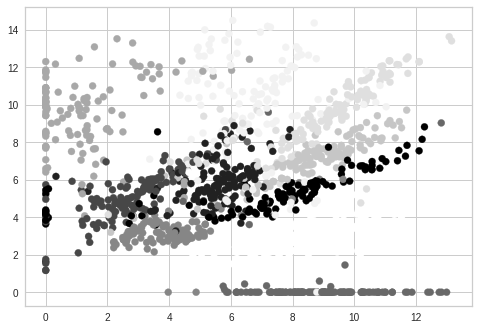

In [17]:
## REPRESENTACION CON CODIFICADOR DE LA MEJOR RELU
codif = codificador.predict(X_train)
plt.scatter(codif[:,0], codif[:,1], c=y_train)
plt.show()

In [18]:
from sklearn.decomposition import PCA
myPCA = PCA().fit(X_train);

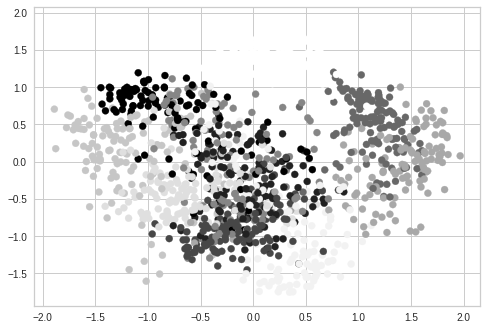

In [19]:
plt.scatter(myPCA.transform(X_train)[:,0], myPCA.transform(X_train)[:,1], c=y_train)
plt.show()

La red linear produce una salida exactamente igual que el PCA, pero en espejo sobre el eje y. 
https://stats.stackexchange.com/questions/120080/whatre-the-differences-between-pca-and-autoencoder

En Google hemos encontrado que un autoencoder de una capa con función de activación lineal es prácticamente igual a un PCA. El PCA está restringido a un mapa lineal, mientras que el autoencoder no.

Calculad la codificación para algunos ejemplos de los datos de test utilizando la mejor
red y representad los resultados. ¿La salida es similar a la entrada?

In [20]:
d1 =32
act = 'sigmoid'
entrada = keras.Input(shape=(64,))
codificar = keras.layers.Dense(d1, activation=act)(entrada)
codificar = keras.layers.Dense(d2, activation=act)(codificar)
decodificar = keras.layers.Dense(d1, activation=act)(codificar)
decodificar = keras.layers.Dense(64, activation=act)(decodificar)
autocodificador = keras.Model(entrada, decodificar)
codificador = keras.Model(entrada, codificar)
autocodificador.compile(optimizer=keras.optimizers.Adam(),
loss=keras.losses.MeanSquaredError())
autocodificador.fit(X_train, X_train,batch_size=BATCH_SIZE,
epochs=EPOCHS, verbose=False)
print(autocodificador.evaluate(X_train, X_train))
print(autocodificador.evaluate(X_test, X_test))

40/40 [==============================] - 0s 2ms/step - loss: 0.0361
0.036064814776182175
17/17 [==============================] - 0s 2ms/step - loss: 0.0386
0.03858853504061699


In [21]:
import math
def show_images(X, num_images):
    n = int(math.sqrt(len(X[1])))
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images): 
            plt.subplot(num_images/10,10,digit_num+1) #create subplots
            mat_data = X[digit_num].reshape(n,n)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis

In [22]:
#CALCULAR CODIFICACION
codif_test = autocodificador.predict(X_test)

17/17 [==============================] - 0s 1ms/step


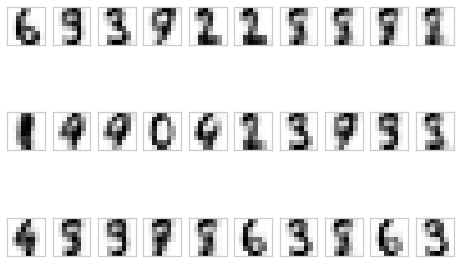

In [23]:
#REPRESENTACIÓN DATOS
show_images(codif_test, 30)

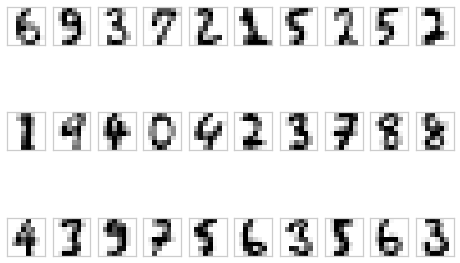

In [24]:
#REPRESENTACIÓN DATOS
show_images(X_test, 30)

Sí, la salida es similar a la entrada

Aprender a reproducir la entrada también tiene otras aplicaciones como la corrección de errores. Un auto-codificador de eliminación de ruido (denoising autoencoder) se entrena con una entrada corrupta para reproducir la entrada original. Utilizad la mejor red
de la pregunta anterior. Generad un nuevo conjunto de datos como una copia del conjunto de entrenamiento original y corromped los datos cambiando posiciones aleatorias en los ejemplos a valores de una distribución uniforme [0-1]. Generad un conjunto de datos con 10 % y 30 % de valores corruptos.

Entrenad el auto-codificador y calculad el error cuadrático de la salida con respecto a
los datos originales para el entrenamiento y el test. ¿Es el error ahora mejor o peor?
¿Por qué?

In [25]:
#GENERACION CONJUNTO CON RUIDO
X_train_10 = X_train.copy()
X_train_30 = X_train.copy()

n = len(X_train)
p10 = n*10 // 100
p30 = n*30 // 100
pixels = 64

In [26]:
for i in range(p10):
  for j in range(pixels):
    X_train_10[i][j] = np.random.uniform()

for i in range(p30):
  for j in range(pixels):
    X_train_30[i][j] = np.random.uniform()

In [27]:
X_train

array([[0.    , 0.    , 0.3125, ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.1875, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.3125, ..., 1.    , 0.6875, 0.125 ],
       ...,
       [0.    , 0.    , 0.5625, ..., 1.    , 0.125 , 0.    ],
       [0.    , 0.    , 0.0625, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.0625, ..., 0.0625, 0.    , 0.    ]])

In [28]:
X_train_10

array([[0.57753349, 0.12542315, 0.10584333, ..., 0.87443761, 0.67774732,
        0.89606594],
       [0.39558004, 0.04537472, 0.41958982, ..., 0.07081588, 0.09883191,
        0.31959964],
       [0.53241041, 0.71240342, 0.90367483, ..., 0.67571194, 0.13743936,
        0.5031928 ],
       ...,
       [0.        , 0.        , 0.5625    , ..., 1.        , 0.125     ,
        0.        ],
       [0.        , 0.        , 0.0625    , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0625    , ..., 0.0625    , 0.        ,
        0.        ]])

In [29]:
X_train_30

array([[0.5019775 , 0.63632934, 0.1243893 , ..., 0.05503129, 0.83952901,
        0.3303294 ],
       [0.21409834, 0.44592861, 0.2981783 , ..., 0.01875201, 0.64777716,
        0.37346141],
       [0.94631675, 0.94959464, 0.91882792, ..., 0.28865192, 0.98922884,
        0.6693108 ],
       ...,
       [0.        , 0.        , 0.5625    , ..., 1.        , 0.125     ,
        0.        ],
       [0.        , 0.        , 0.0625    , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0625    , ..., 0.0625    , 0.        ,
        0.        ]])

In [30]:
d1 =32
act = 'sigmoid'
entrada = keras.Input(shape=(64,))
codificar = keras.layers.Dense(d1, activation=act)(entrada)
codificar = keras.layers.Dense(d2, activation=act)(codificar)
decodificar = keras.layers.Dense(d1, activation=act)(codificar)
decodificar = keras.layers.Dense(64, activation=act)(decodificar)
autocodificador = keras.Model(entrada, decodificar)
codificador = keras.Model(entrada, codificar)
autocodificador.compile(optimizer=keras.optimizers.Adam(),
loss=keras.losses.MeanSquaredError())
autocodificador.fit(X_train_10, X_train_10, batch_size=BATCH_SIZE,
epochs=EPOCHS, verbose=False)
print(autocodificador.evaluate(X_train, X_train))
print(autocodificador.evaluate(X_test, X_test))

40/40 [==============================] - 0s 2ms/step - loss: 0.0378
0.037841834127902985
17/17 [==============================] - 0s 2ms/step - loss: 0.0396
0.039574261754751205


In [31]:
d1 =32
act = 'sigmoid'
entrada = keras.Input(shape=(64,))
codificar = keras.layers.Dense(d1, activation=act)(entrada)
codificar = keras.layers.Dense(d2, activation=act)(codificar)
decodificar = keras.layers.Dense(d1, activation=act)(codificar)
decodificar = keras.layers.Dense(64, activation=act)(decodificar)
autocodificador = keras.Model(entrada, decodificar)
codificador = keras.Model(entrada, codificar)
autocodificador.compile(optimizer=keras.optimizers.Adam(),
loss=keras.losses.MeanSquaredError())
autocodificador.fit(X_train_30, X_train_30,batch_size=BATCH_SIZE,
epochs=EPOCHS, verbose=False)
print(autocodificador.evaluate(X_train, X_train))
print(autocodificador.evaluate(X_test, X_test))

40/40 [==============================] - 0s 2ms/step - loss: 0.0382
0.03824756294488907
17/17 [==============================] - 0s 2ms/step - loss: 0.0403
0.04026050120592117


Los resultados son algo peores, empeorando más cuando hay más ruido en el entrenamiento. Tiene sentido, pues a más ruido la red aprende a codificar y decodificar más cosas que no son dígitos.

Concatenad dos copias de los datos de entrenamiento (duplicad los datos) y cread
dos conjuntos de datos con 10 % y 30 % de corrupción respectivamente. Entrenad el
auto-codificador con estos datos. ¿Es el error ahora mejor?

In [32]:
X_train_ex = np.append(X_train.copy(), X_train.copy(), axis = 0)

In [33]:
#GENERACION CONJUNTO EXTENDIDO CON RUIDO
X_train_ex_10 = X_train_ex.copy()
X_train_ex_30 = X_train_ex.copy()

n = len(X_train_ex)
p10 = n*10 // 100
p30 = n*30 // 100
pixels = 64

In [34]:
for i in range(p10):
  for j in range(pixels):
    X_train_ex_10[i][j] = np.random.uniform()

for i in range(p30):
  for j in range(pixels):
    X_train_ex_30[i][j] = np.random.uniform()

In [35]:
d1 =32
act = 'sigmoid'
entrada = keras.Input(shape=(64,))
codificar = keras.layers.Dense(d1, activation=act)(entrada)
codificar = keras.layers.Dense(d2, activation=act)(codificar)
decodificar = keras.layers.Dense(d1, activation=act)(codificar)
decodificar = keras.layers.Dense(64, activation=act)(decodificar)
autocodificador = keras.Model(entrada, decodificar)
codificador = keras.Model(entrada, codificar)
autocodificador.compile(optimizer=keras.optimizers.Adam(),
loss=keras.losses.MeanSquaredError())
autocodificador.fit(X_train_ex_10, X_train_ex_10, batch_size=BATCH_SIZE,
epochs=EPOCHS, verbose=False)
print(autocodificador.evaluate(X_train, X_train))
print(autocodificador.evaluate(X_test, X_test))

40/40 [==============================] - 0s 4ms/step - loss: 0.0326
0.03255891799926758
17/17 [==============================] - 0s 3ms/step - loss: 0.0354
0.03544791787862778


In [36]:
d1 =32
act = 'sigmoid'
entrada = keras.Input(shape=(64,))
codificar = keras.layers.Dense(d1, activation=act)(entrada)
codificar = keras.layers.Dense(d2, activation=act)(codificar)
decodificar = keras.layers.Dense(d1, activation=act)(codificar)
decodificar = keras.layers.Dense(64, activation=act)(decodificar)
autocodificador = keras.Model(entrada, decodificar)
codificador = keras.Model(entrada, codificar)
autocodificador.compile(optimizer=keras.optimizers.Adam(),
loss=keras.losses.MeanSquaredError())
autocodificador.fit(X_train_ex_30, X_train_ex_30,batch_size=BATCH_SIZE,
epochs=EPOCHS, verbose=False)
print(autocodificador.evaluate(X_train, X_train))
print(autocodificador.evaluate(X_test, X_test))

40/40 [==============================] - 0s 2ms/step - loss: 0.0327
0.0327175036072731
17/17 [==============================] - 0s 2ms/step - loss: 0.0355
0.0355185866355896


Sí, el error ahora es mejor.

Utilizad el codificador entrenado con los conjuntos de datos de entrenamiento corrupto
doblado que tiene el mejor error cuadrático y transformad los datos de entrenamiento
originales. Comparad la representación 2D con la del codificador original (el que no
tiene ruido). ¿Son los datos más separables ahora?

In [37]:
d1 =32
act = 'sigmoid'
entrada = keras.Input(shape=(64,))
codificar = keras.layers.Dense(d1, activation=act)(entrada)
codificar = keras.layers.Dense(d2, activation=act)(codificar)
decodificar = keras.layers.Dense(d1, activation=act)(codificar)
decodificar = keras.layers.Dense(64, activation=act)(decodificar)
autocodificador = keras.Model(entrada, decodificar)
codificador = keras.Model(entrada, codificar)
autocodificador.compile(optimizer=keras.optimizers.Adam(),
loss=keras.losses.MeanSquaredError())
autocodificador.fit(X_train_ex_10, X_train_ex_10, batch_size=BATCH_SIZE,
epochs=EPOCHS, verbose=False)
print(autocodificador.evaluate(X_train, X_train))
print(autocodificador.evaluate(X_test, X_test))

40/40 [==============================] - 0s 2ms/step - loss: 0.0308
0.03084956668317318
17/17 [==============================] - 0s 2ms/step - loss: 0.0353
0.035262156277894974


40/40 [==============================] - 0s 1ms/step


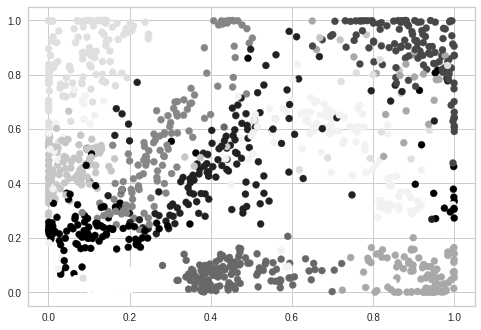

In [38]:
codif = codificador.predict(X_train)
plt.scatter(codif[:,0], codif[:,1], c=y_train)
plt.show()

17/17 [==============================] - 0s 2ms/step


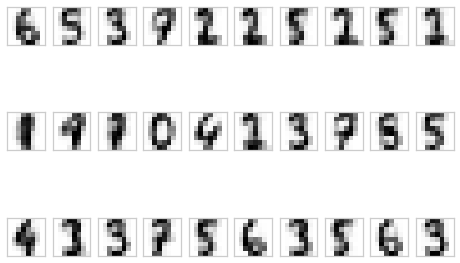

In [39]:
#REPRESENTACIÓN DATOS
show_images(autocodificador.predict(X_test), 30)

Sí, las clases són notablemente más separables ahora. Además, la representación de la codificación de los datos de test se parece más a los datos originales.